# Ejercicio:

Se va a tratar de aplicar una clusterización y un algoritmo predictivo al conjunto de datos 'Cervezas.csv'

## Lectura de Datos y EDA

In [243]:
# 1. Importar librerías
import numpy as np
import pandas as pd
import openpyxl

import plotly as py
import plotly.express as px
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import warnings

import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT
import seaborn as sns

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as Arbol
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

In [183]:
#Para mostrar todas las columnas
#pd.options.display.max_columns = None

In [184]:
# 2. Importar datos
df_cervezas = pd.read_csv('Cervezas.csv')
df_cervezas

,id. cervecera,nombre cervecera,fecha encuesta,nota global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volument de alcohol,id. cerveza;;;;
0,1075,Caldera Brewing Company,1.210469e+09,4.0,4.0,4.5,Wasatch,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.50,25414;;;;
1,1075,Caldera Brewing Company,1.299617e+09,2.5,3.5,4.0,Thorpe429,American Pale Ale (APA),2.0,2.5,Caldera Pale Ale,5.50,25414;;;;
2,1075,Caldera Brewing Company,1.262623e+09,4.5,3.5,3.5,rfgetz,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.50,25414;;;;
3,1075,Caldera Brewing Company,1.281982e+09,4.0,4.0,4.0,Brent,American IPA,4.0,4.0,Caldera IPA,6.10,10784;;;;
4,1075,Caldera Brewing Company,1.280541e+09,5.0,4.0,4.5,JohnQVegas,American IPA,4.5,5.0,Caldera IPA,6.10,10784;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,3835,Drake's Brewing Co.,1.238419e+09,4.5,4.0,4.0,ThirdLap,Russian Imperial Stout,4.0,4.5,Drake's Drakonic Imperial Stout,8.75,12172;;;;
15862,3835,Drake's Brewing Co.,1.220863e+09,4.5,3.5,4.0,slayer3604,Russian Imperial Stout,5.0,4.5,Drake's Drakonic Imperial Stout,8.75,12172;;;;
15863,22616,Fiddler's Green Brewing Company,1.184622e+09,2.0,2.5,3.0,TheClassical,English India Pale Ale (IPA),2.0,2.0,Fiddler's Green India Pale Ale,NaN,36515;;;;
15864,10434,Mia & Pia's Pizzeria And Brewhouse,1.100824e+09,5.0,3.5,5.0,RedDiamond,Extra Special / Strong Bitter (ESB),4.0,4.5,Flash Flood ESB,4.80,20811;;;;


### EDA

In [185]:
df_cervezas.columns

Index(['id. cervecera', 'nombre cervecera', 'fecha encuesta', 'nota global',
       'aroma', 'aspecto', 'encuestado', 'estilo', 'paladar', 'gusto',
       'nombre', 'volument de alcohol', 'id. cerveza;;;;'],
      dtype='object')

In [186]:
# Se va a limpiar la columna id. cerveza;;;;
df_cervezas.rename(columns={'id. cerveza;;;;': 'id_cerveza'}, inplace=True)

# Eliminar los caracteres ';' de la columna 'id_cerveza'
df_cervezas['id_cerveza'] = df_cervezas['id_cerveza'].str.replace(';', '')

# Mostrar el DataFrame con la columna 'id_cerveza' modificada
print(df_cervezas['id_cerveza'].head())

0    25414
1    25414
2    25414
3    10784
4    10784
Name: id_cerveza, dtype: object


In [187]:
# Otros cambios de nombre a columnas
df_cervezas.rename(columns={'id. cervecera': 'id_cervecera'}, inplace=True)
df_cervezas.rename(columns={'nombre cervecera': 'nombre_cervecera'}, inplace=True)
df_cervezas.rename(columns={'nota global': 'nota_global'}, inplace=True)
df_cervezas.rename(columns={'volument de alcohol': 'volumen_de_alcohol'}, inplace=True)
df_cervezas.columns

Index(['id_cervecera', 'nombre_cervecera', 'fecha encuesta', 'nota_global',
       'aroma', 'aspecto', 'encuestado', 'estilo', 'paladar', 'gusto',
       'nombre', 'volumen_de_alcohol', 'id_cerveza'],
      dtype='object')

In [188]:
df_cervezas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15866 entries, 0 to 15865
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_cervecera        15866 non-null  object 
 1   nombre_cervecera    15273 non-null  object 
 2   fecha encuesta      15273 non-null  float64
 3   nota_global         15273 non-null  float64
 4   aroma               15273 non-null  float64
 5   aspecto             15273 non-null  float64
 6   encuestado          15271 non-null  object 
 7   estilo              15273 non-null  object 
 8   paladar             15273 non-null  float64
 9   gusto               15273 non-null  float64
 10  nombre              15273 non-null  object 
 11  volumen_de_alcohol  14644 non-null  float64
 12  id_cerveza          15273 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.6+ MB


In [189]:
# Se van a analizar los nulos
null_counts = df_cervezas.isnull().sum()
print(null_counts[null_counts > 0])

nombre_cervecera       593
fecha encuesta         593
nota_global            593
aroma                  593
aspecto                593
encuestado             595
estilo                 593
paladar                593
gusto                  593
nombre                 593
volumen_de_alcohol    1222
id_cerveza             593
dtype: int64


In [190]:
df_cervezas[df_cervezas['nombre_cervecera'].isnull()]

,id_cervecera,nombre_cervecera,fecha encuesta,nota_global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volumen_de_alcohol,id_cerveza
22,"1463,Harboes Bryggeri A/S,1178050474,3.5,3.0,4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,"1386,Harmon Restaurant & Brewery,1160977767,3....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,"12224,Rinkuškiai Alaus Darykloje,1265079747,3....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,"14,Cambridge Brewing Company,1095126669,3.0,4....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,"1,""Plzensky Prazdroj, a. s."",1092433034,4.5,3....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,"259,Brouwerij St. Bernardus NV,1192767803,4.0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15116,"259,Brouwerij St. Bernardus NV,1157181015,4.5,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15473,"4712,""Brewhouse, The"",1290714731,3.0,3.0,3.5,t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15474,"4712,""Brewhouse, The"",1225669190,3.0,3.0,4.0,r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Viendo los 593 registros que son nulos en todas las columnas excepto en la primera (id_cervecera), se saca la conclusión de que esto se debe a que no se han leído bien los datos de estos valores. 

Se va a optar por pasar el .csv al formato .xls (Excel) y leer de nuevo los datos para verificar si esto se soluciona.

In [191]:
# Lectura de nuevo del conjunto de datos
df_cervezas = pd.read_excel('Cervezas.xlsx')
df_cervezas

,id. cervecera,nombre cervecera,fecha encuesta,nota global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volument de alcohol,id. cerveza
0,1075,Caldera Brewing Company,1.210469e+09,4.0,4.0,4.5,Wasatch,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.50,25414.0
1,1075,Caldera Brewing Company,1.299617e+09,2.5,3.5,4.0,Thorpe429,American Pale Ale (APA),2.0,2.5,Caldera Pale Ale,5.50,25414.0
2,1075,Caldera Brewing Company,1.262623e+09,4.5,3.5,3.5,rfgetz,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.50,25414.0
3,1075,Caldera Brewing Company,1.281982e+09,4.0,4.0,4.0,Brent,American IPA,4.0,4.0,Caldera IPA,6.10,10784.0
4,1075,Caldera Brewing Company,1.280541e+09,5.0,4.0,4.5,JohnQVegas,American IPA,4.5,5.0,Caldera IPA,6.10,10784.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,3835,Drake's Brewing Co.,1.238419e+09,4.5,4.0,4.0,ThirdLap,Russian Imperial Stout,4.0,4.5,Drake's Drakonic Imperial Stout,8.75,12172.0
15862,3835,Drake's Brewing Co.,1.220863e+09,4.5,3.5,4.0,slayer3604,Russian Imperial Stout,5.0,4.5,Drake's Drakonic Imperial Stout,8.75,12172.0
15863,22616,Fiddler's Green Brewing Company,1.184622e+09,2.0,2.5,3.0,TheClassical,English India Pale Ale (IPA),2.0,2.0,Fiddler's Green India Pale Ale,NaN,36515.0
15864,10434,Mia & Pia's Pizzeria And Brewhouse,1.100824e+09,5.0,3.5,5.0,RedDiamond,Extra Special / Strong Bitter (ESB),4.0,4.5,Flash Flood ESB,4.80,20811.0


In [192]:
# Otros cambios de nombre a columnas
df_cervezas.rename(columns={'id. cervecera': 'id_cervecera'}, inplace=True)
df_cervezas.rename(columns={'fecha encuesta': 'fecha_encuesta'}, inplace=True)
df_cervezas.rename(columns={'nombre cervecera': 'nombre_cervecera'}, inplace=True)
df_cervezas.rename(columns={'nota global': 'nota_global'}, inplace=True)
df_cervezas.rename(columns={'volument de alcohol': 'volumen_de_alcohol'}, inplace=True)
df_cervezas.rename(columns={'id. cerveza': 'id_cerveza'}, inplace=True)
df_cervezas.columns

Index(['id_cervecera', 'nombre_cervecera', 'fecha_encuesta', 'nota_global',
       'aroma', 'aspecto', 'encuestado', 'estilo', 'paladar', 'gusto',
       'nombre', 'volumen_de_alcohol', 'id_cerveza'],
      dtype='object')

In [193]:
df_cervezas.describe()

,id_cervecera,fecha_encuesta,nota_global,aroma,aspecto,paladar,gusto,volumen_de_alcohol,id_cerveza
count,15866.000000,1.584900e+04,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15183.000000,15844.000000
mean,3086.054330,1.225278e+09,3.812543,3.730425,3.832860,3.738879,3.787558,7.026682,21812.098523
std,5511.271176,7.660588e+07,0.719933,0.695046,0.618333,0.682269,0.730726,2.336596,21884.384406
min,1.000000,9.330336e+08,1.000000,1.000000,1.000000,1.000000,1.000000,0.450000,5.000000
25%,142.000000,1.175353e+09,3.500000,3.500000,3.500000,3.500000,3.500000,5.200000,1774.000000
50%,423.000000,1.240619e+09,4.000000,4.000000,4.000000,4.000000,4.000000,6.500000,14321.500000
75%,2372.000000,1.290030e+09,4.500000,4.000000,4.000000,4.000000,4.500000,8.500000,39436.500000
max,27798.000000,1.326258e+09,5.000000,5.000000,5.000000,5.000000,5.000000,41.000000,77131.000000


#### Tratamiento nulos

In [194]:
# Se vuelven a analizar los nulos
null_counts = df_cervezas.isnull().sum()
print(null_counts[null_counts > 0])

fecha_encuesta         17
nota_global            17
aroma                  17
aspecto                17
encuestado             19
estilo                 17
paladar                17
gusto                  17
nombre                 17
volumen_de_alcohol    683
id_cerveza             22
dtype: int64


In [195]:
# Se verifica que los 17 registros son nulos en todos las variables
df_cervezas[df_cervezas['fecha_encuesta'].isnull()]

,id_cervecera,nombre_cervecera,fecha_encuesta,nota_global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volumen_de_alcohol,id_cerveza
535,20810,Vilkmerg&#279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2423,1730,Karlova&#267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2424,1730,Karlova&#267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2425,1730,Karlova&#267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3969,16331,Banjalu&#269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3970,16331,Banjalu&#269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6885,580,Browar &#321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7925,11206,Pivovar Podkov√°&#328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12659,5509,Browary Warmi&#324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13578,2438,Browar Namys&#322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# Se van a eliminar estos 17 registros
df_cervezas = df_cervezas.dropna(subset=['fecha_encuesta'])
null_counts = df_cervezas.isnull().sum()
print(null_counts[null_counts > 0])

encuestado              2
volumen_de_alcohol    666
id_cerveza              5
dtype: int64


In [197]:
# Se estudian los nulos de 'encuestado'
df_cervezas[df_cervezas['encuestado'].isnull()]

,id_cervecera,nombre_cervecera,fecha_encuesta,nota_global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volumen_de_alcohol,id_cerveza
2093,264,Oy Sinebrychoff Ab,1.231727e+09,4.0,3.5,4.0,NaN,Baltic Porter,4.0,3.5,Sinebrychoff Porter,7.2,2758.0
10444,39,Privatbrauerei Franz Inselkammer KG / Brauerei...,1.073494e+09,5.0,4.5,4.5,NaN,Doppelbock,4.5,5.0,Ayinger Celebrator Doppelbock,6.7,131.0


In [198]:
# Reemplazar nulos en 'encuestado' por 'Desconocido'
df_cervezas['encuestado'].fillna('Desconocido', inplace=True)

/var/folders/79/rwrch1qx1y7bm5mc3hnnntw00000gn/T/ipykernel_89060/814556300.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cervezas['encuestado'].fillna('Desconocido', inplace=True)
/var/folders/79/rwrch1qx1y7bm5mc3hnnntw00000gn/T/ipykernel_89060/814556300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cervezas['encuestado'].fil

In [199]:
# Se estudian los nulos de 'id_cerveza'
df_cervezas[df_cervezas['id_cerveza'].isnull()]

,id_cervecera,nombre_cervecera,fecha_encuesta,nota_global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volumen_de_alcohol,id_cerveza
6242,16197,Pivovar Rohozec,1.250595e+09,2.5,3.0,3.5,stcules,Euro Dark Lager,2.5,2.5,Rohozec Skal√°k &#344,NaN,NaN
10348,1382,Aldaris,1.272303e+09,2.5,3.0,4.0,atis,Euro Pale Lager,2.5,3.0,D&#363,NaN,NaN
11220,14718,The Brew Keeper,1.243303e+09,3.5,3.5,3.5,beveritt,Milk / Sweet Stout,3.0,3.5,Brew Keeper 2Ch&#8322,NaN,NaN
14224,18153,SIA Alus Nams,1.244374e+09,3.5,4.0,4.0,atis,Euro Pale Lager,4.0,3.5,Br&#257,NaN,NaN
15782,9346,Pivovar Svijany,1.238923e+09,3.5,3.0,3.5,stcules,Czech Pilsener,3.0,3.5,Svijany Kvasni&#269,NaN,NaN


In [200]:
# Se eliminan los nulos de 'id_cerveza' ya que son muy pocos
df_cervezas = df_cervezas.dropna(subset=['id_cerveza'])

In [201]:
# Para los nulos de 'volumen_de_alcohol' se reemplazarán por la mediana, ya que son muchos registros.

# Calcular la mediana o la media de la columna 'volumen_de_alcohol'
volumen_medio = df_cervezas['volumen_de_alcohol'].median()  # O puedes usar .mean() si prefieres la media

# Reemplazar los valores nulos por la mediana o la media
df_cervezas['volumen_de_alcohol'].fillna(volumen_medio, inplace=True)

# Verificar que se hayan reemplazado los valores nulos
print(df_cervezas.isnull().sum())

id_cervecera          0
nombre_cervecera      0
fecha_encuesta        0
nota_global           0
aroma                 0
aspecto               0
encuestado            0
estilo                0
paladar               0
gusto                 0
nombre                0
volumen_de_alcohol    0
id_cerveza            0
dtype: int64


/var/folders/79/rwrch1qx1y7bm5mc3hnnntw00000gn/T/ipykernel_89060/1004172010.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cervezas['volumen_de_alcohol'].fillna(volumen_medio, inplace=True)


#### Transformaciones y/o eliminado de columnas

In [202]:
# La columna fecha_encuesta está en un formato incorrecto
df_cervezas['fecha_encuesta'] = pd.to_datetime(df_cervezas['fecha_encuesta'], unit='s')

# Verificar el resultado
print(df_cervezas['fecha_encuesta'])

0       2008-05-11 01:17:24
1       2011-03-08 20:37:34
2       2010-01-04 16:42:46
3       2010-08-16 18:01:41
4       2010-07-31 01:51:03
                ...        
15861   2009-03-30 13:22:35
15862   2008-09-08 08:40:30
15863   2007-07-16 21:42:44
15864   2004-11-19 00:33:17
15865   2007-05-18 01:39:57
Name: fecha_encuesta, Length: 15844, dtype: datetime64[ns]


In [203]:
# Eliminación de columnas que no interesan
df_cervezas = df_cervezas.drop(['nombre_cervecera', 'encuestado', 'nombre'], axis=1)

In [204]:
## Variables categóricas -> Encoder
label_encoder = LabelEncoder()
df_cervezas_encoder = df_cervezas.copy()
# Aplicar el LabelEncoder a la columna 'estilo'
df_cervezas_encoder['estilo'] = label_encoder.fit_transform(df_cervezas['estilo'])
print(df_cervezas_encoder['estilo'])

0        14
1        14
2        14
3        12
4        12
         ..
15861    89
15862    89
15863    46
15864    55
15865    47
Name: estilo, Length: 15844, dtype: int64


In [205]:
df_cervezas_encoder.describe()

,id_cervecera,fecha_encuesta,nota_global,aroma,aspecto,estilo,paladar,gusto,volumen_de_alcohol,id_cerveza
count,15844.000000,15844,15844.000000,15844.000000,15844.000000,15844.000000,15844.000000,15844.000000,15844.000000,15844.000000
mean,3081.283704,2008-10-29 08:50:25.918644480,3.812768,3.730560,3.832902,42.233338,3.739113,3.787743,7.004709,21812.098523
min,1.000000,1999-07-27 00:00:01,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.450000,5.000000
25%,142.000000,2007-03-31 00:02:12.750000128,3.500000,3.500000,3.500000,12.000000,3.500000,3.500000,5.300000,1774.000000
50%,423.000000,2009-04-24 21:21:42,4.000000,4.000000,4.000000,31.000000,4.000000,4.000000,6.500000,14321.500000
75%,2372.000000,2010-11-17 22:25:20.500000,4.500000,4.000000,4.000000,74.000000,4.000000,4.500000,8.300000,39436.500000
max,27798.000000,2012-01-11 05:04:45,5.000000,5.000000,5.000000,103.000000,5.000000,5.000000,41.000000,77131.000000
std,5507.263171,NaN,0.719882,0.695077,0.618410,33.009038,0.682181,0.730732,2.289756,21884.384406


Se va a definir la variable objetivo en función de la nota_global. Para ello se va a observar un poco más en detalle dicha variable

In [206]:
# value_counts de nota_global
df_cervezas_encoder['nota_global'].value_counts()

nota_global
4.0    5766
4.5    3218
3.5    3088
3.0    1663
5.0     911
2.5     583
2.0     377
1.5     126
1.0     112
Name: count, dtype: int64

In [207]:
# Definir la variable objetivo
df_cervezas_encoder['gusta'] = df_cervezas_encoder['nota_global'] >= 4.0

# Convertir a valores binarios (1 si gusta, 0 si no gusta)
df_cervezas_encoder['gusta'] = df_cervezas_encoder['gusta'].astype(int)

# Eliminar la variable nota_global
df_cervezas_encoder.drop(columns=['nota_global'], inplace=True)
df_cervezas_encoder

,id_cervecera,fecha_encuesta,aroma,aspecto,estilo,paladar,gusto,volumen_de_alcohol,id_cerveza,gusta
0,1075,2008-05-11 01:17:24,4.0,4.5,14,4.0,4.0,5.50,25414.0,1
1,1075,2011-03-08 20:37:34,3.5,4.0,14,2.0,2.5,5.50,25414.0,0
2,1075,2010-01-04 16:42:46,3.5,3.5,14,4.0,4.0,5.50,25414.0,1
3,1075,2010-08-16 18:01:41,4.0,4.0,12,4.0,4.0,6.10,10784.0,1
4,1075,2010-07-31 01:51:03,4.0,4.5,12,4.5,5.0,6.10,10784.0,1
...,...,...,...,...,...,...,...,...,...,...
15861,3835,2009-03-30 13:22:35,4.0,4.0,89,4.0,4.5,8.75,12172.0,1
15862,3835,2008-09-08 08:40:30,3.5,4.0,89,5.0,4.5,8.75,12172.0,1
15863,22616,2007-07-16 21:42:44,2.5,3.0,46,2.0,2.0,6.50,36515.0,0
15864,10434,2004-11-19 00:33:17,3.5,5.0,55,4.0,4.5,4.80,20811.0,1


#### Visualizaciones

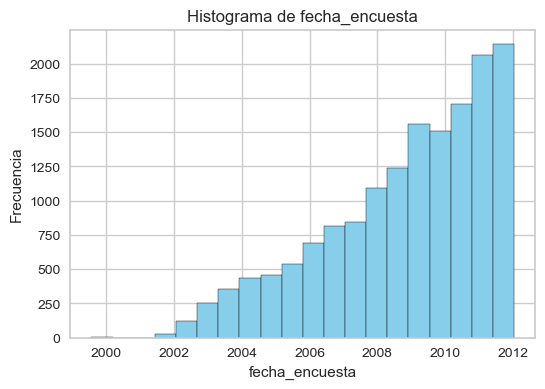

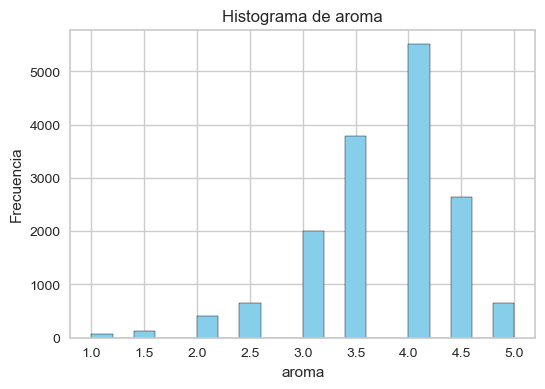

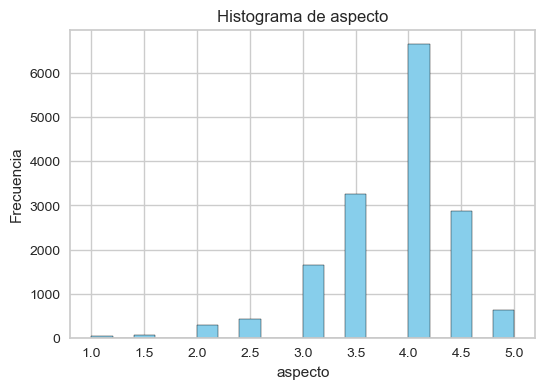

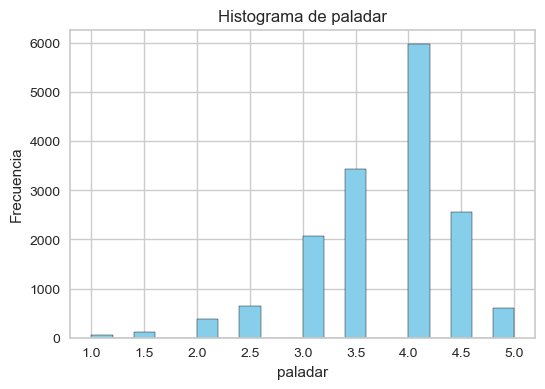

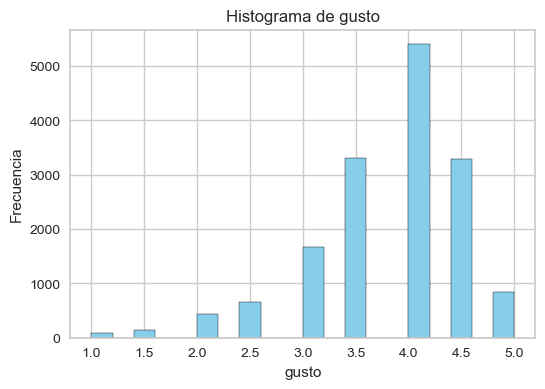

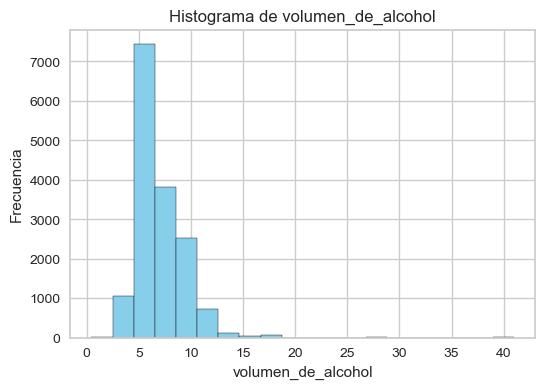

In [208]:
# Visualizar un histograma de las columnas de interés

columns_to_plot = ['fecha_encuesta', 'aroma', 'aspecto', 'paladar', 'gusto', 'volumen_de_alcohol']

# Iterar sobre las columnas y crear un histograma para cada una
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    plt.hist(df_cervezas_encoder[column], bins=20, color='skyblue', edgecolor='black')  # Crear el histograma
    plt.title(f'Histograma de {column}')  # Título del histograma
    plt.xlabel(column)  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y
    plt.grid(True)  # Activar la cuadrícula
    plt.show()  # Mostrar el histograma

In [209]:
# Función para visualización bivariante
def visualize_bivariate_numeric(df, target):
    # Gráficos de histogramas para variables numéricas
    for feature in df.columns:
        if feature != target:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=feature, hue=target, kde=True, palette='viridis')
            plt.title(f'Distribución de {feature} por {target}')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.show()

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anacon

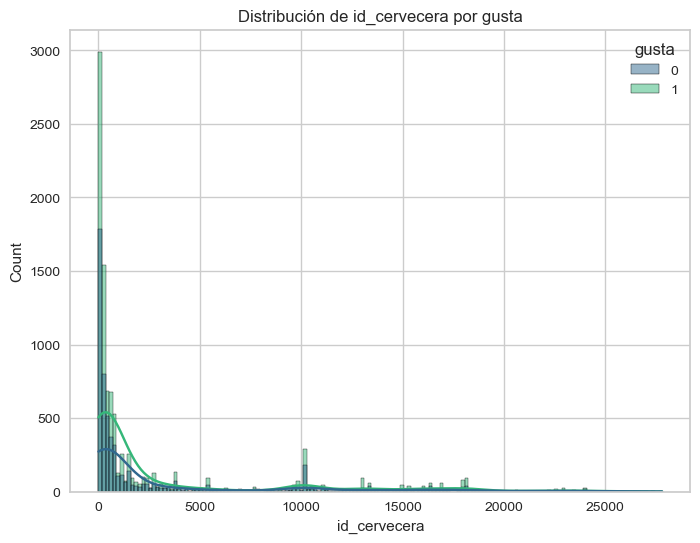

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


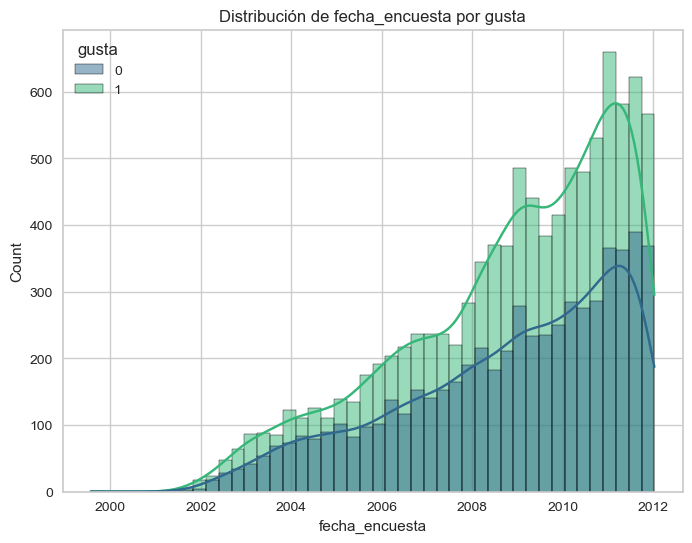

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


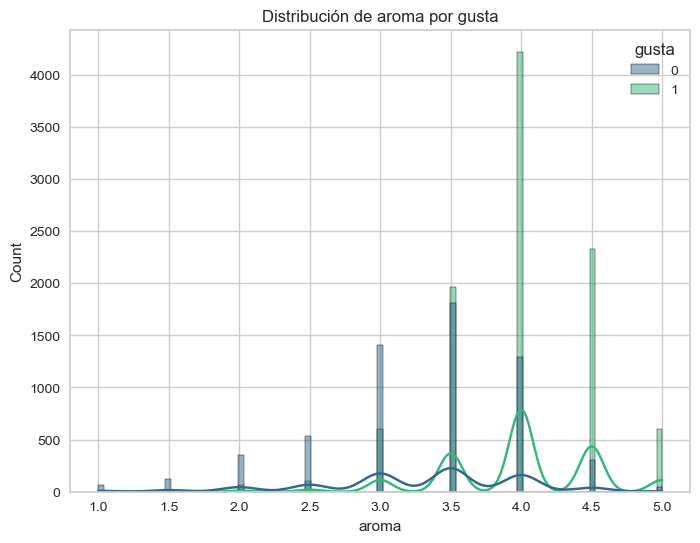

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


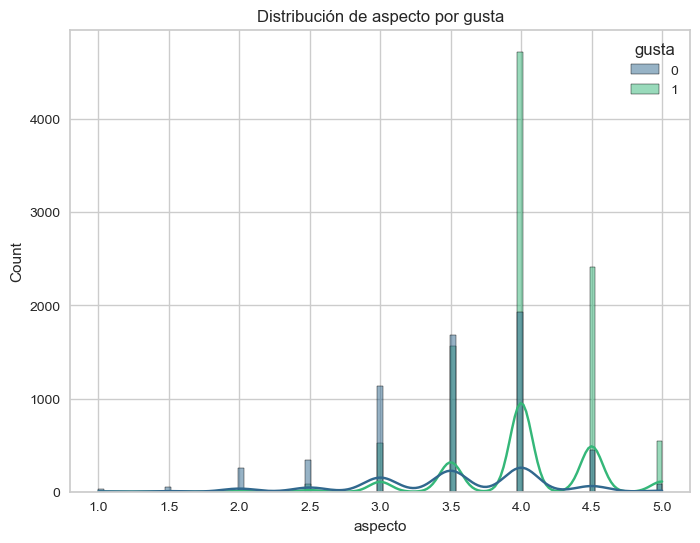

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anacon

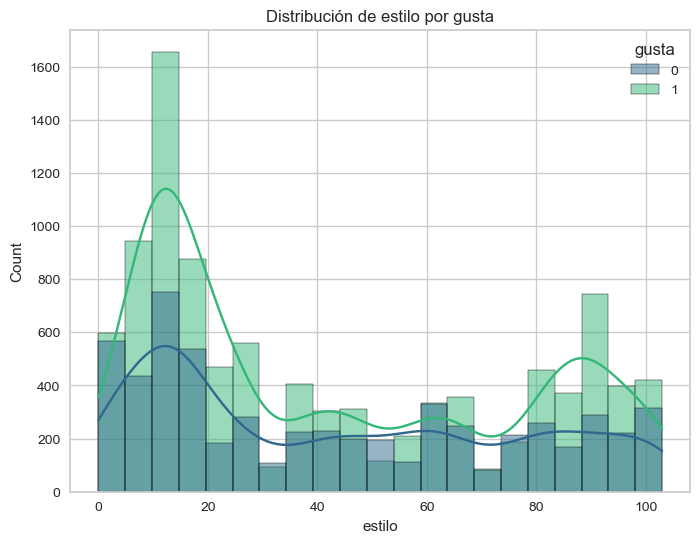

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


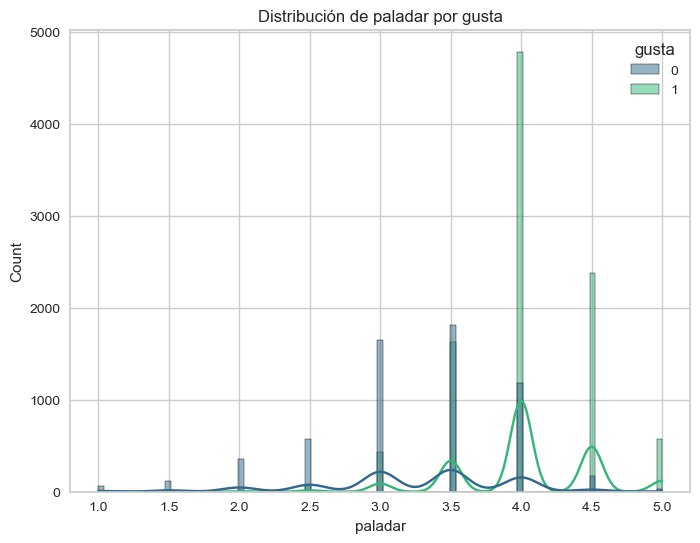

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


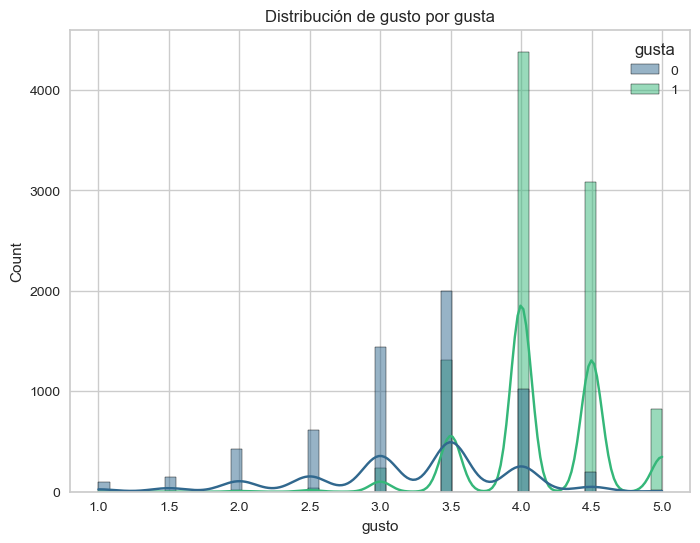

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


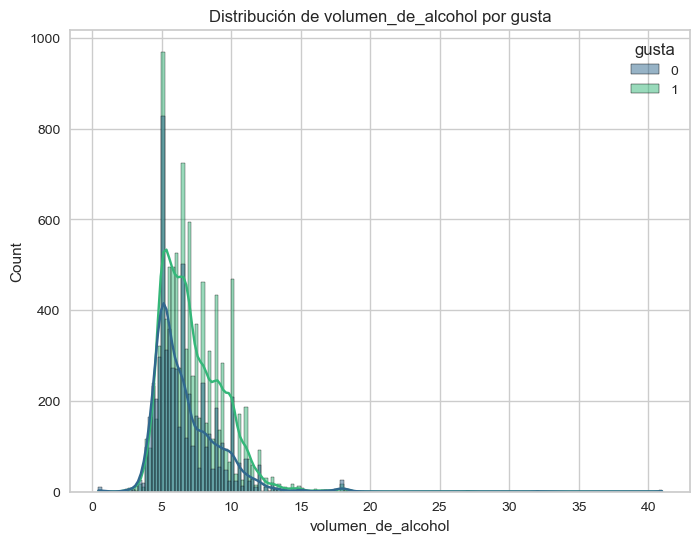

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


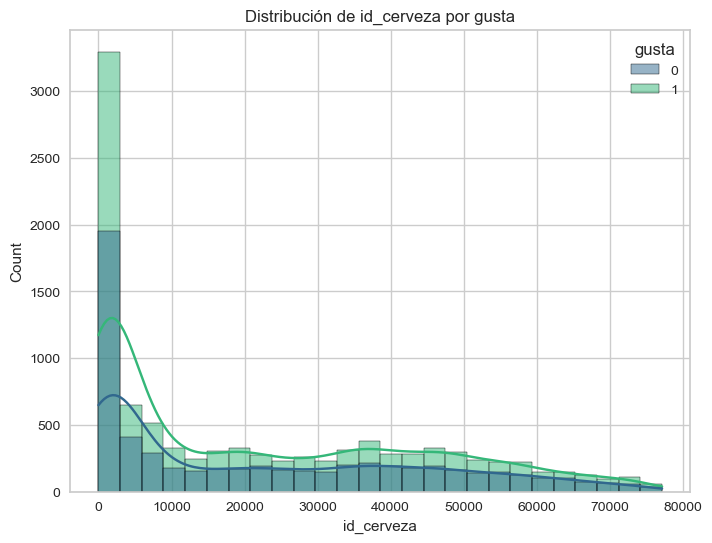

In [210]:
# Llamar a la función con el DataFrame y la variable objetivo
visualize_bivariate_numeric(df_cervezas_encoder, 'gusta')

#### Correlaciones

In [211]:
# Calcular la matriz de correlación
corr_matrix = df_cervezas_encoder.corr()

# Filtrar la diagonal superior
corr_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_upper

,id_cervecera,fecha_encuesta,aroma,aspecto,estilo,paladar,gusto,volumen_de_alcohol,id_cerveza,gusta
id_cervecera,NaN,0.212621,0.024748,0.003765,-0.067545,0.004462,0.000996,0.070666,0.414335,-0.011302
fecha_encuesta,NaN,NaN,0.047202,0.050209,-0.056306,0.043750,0.028981,0.138634,0.461889,0.008630
aroma,NaN,NaN,NaN,0.571499,-0.013799,0.614765,0.713489,0.313064,0.071359,0.479418
aspecto,NaN,NaN,NaN,NaN,-0.025580,0.558834,0.549290,0.257623,0.061760,0.399078
estilo,NaN,NaN,NaN,NaN,NaN,-0.009743,-0.013477,-0.068582,-0.082702,-0.014479
paladar,NaN,NaN,NaN,NaN,NaN,NaN,0.729384,0.258675,0.044025,0.560298
gusto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266151,0.023583,0.618911
volumen_de_alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.189856,0.105869
id_cerveza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006395
gusta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
# Se va a eliminar la variable fecha_encuesta
df_cervezas_encoder.drop(columns=['fecha_encuesta'], inplace=True)

## Clustering - Modelo K-Means

In [213]:
# El primer paso será normalizar las variables
data = df_cervezas_encoder.copy()

# Se eliminan las variables que no se van a usar: id_cervecera, aspecto, estilo, paladar y id_cerveza
data = data.drop(columns=['id_cervecera', 'aspecto', 'estilo', 'paladar', 'id_cerveza', 'gusta'])
data_normalized = preprocessing.normalize(data)

In [214]:
data_normalized

array([[0.5069794 , 0.5069794 , 0.69709668],
       [0.50128041, 0.35805744, 0.78772636],
       [0.45760432, 0.52297636, 0.7190925 ],
       ...,
       [0.34503278, 0.27602622, 0.89708523],
       [0.46964003, 0.6038229 , 0.64407775],
       [0.55602186, 0.55602186, 0.61780206]])

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/sklearn/cluster/_kmeans.

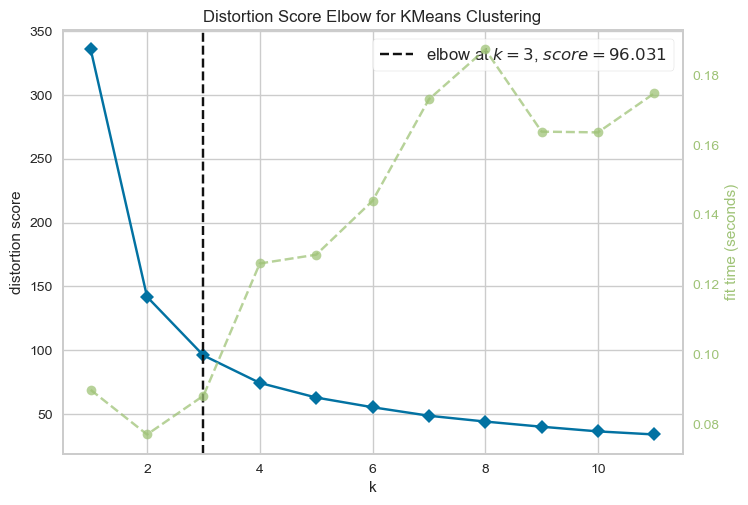

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [215]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(data_normalized)        # Entrenamos con los datos
visualizer.show()        # Renderizamos la imagen

### Entrenamiento del modelo - 3 Segmentos

In [216]:
data.columns

Index(['aroma', 'gusto', 'volumen_de_alcohol'], dtype='object')

In [217]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan')
kmeans.fit(data_normalized)

KMeans(algorithm='elkan', n_clusters=3, n_init=10, random_state=111)

In [218]:
# Añadir las etiquetas de los clústeres al DataFrame original
df_cervezas_encoder['cluster'] = kmeans.labels_

### Descripción variable 'cluster'

In [219]:
# Recuento de categorías por cluster
df_cervezas_encoder['cluster'].value_counts()

cluster
0    6557
1    5250
2    4037
Name: count, dtype: int64

In [220]:
cluster_summary = df_cervezas_encoder.groupby('cluster').agg(['mean', 'median', 'std'])
cluster_summary = cluster_summary.drop(columns=['id_cervecera', 'aspecto', 'estilo', 'paladar', 'id_cerveza'])
cluster_summary

aroma                      gusto                   \
             mean median       std      mean median       std   
cluster                                                         
0        3.722434    4.0  0.652392  3.791292    4.0  0.665505   
1        3.891619    4.0  0.531774  4.001048    4.0  0.514644   
2        3.534308    3.5  0.874637  3.504583    3.5  0.944858   

        volumen_de_alcohol                      gusta                   
                      mean median       std      mean median       std  
cluster                                                                 
0                 6.899602    6.8  1.322433  0.619186    1.0  0.485624  
1                 5.274248    5.2  0.804761  0.747238    1.0  0.434637  
2                 9.425841    9.5  2.668588  0.473619    0.0  0.499365

Interpretación:
- Cluster 0: aroma, gusto y volumen_de_alcohol medio. Nota media/alta (la cerveza gusta)
- Cluster 1: aroma y gusto alto, volumen de alcohol bajo. Nota alta (la cerveza gusta mucho)
- Cluster 2: ahora y gusto bajo, volumen de alcohol alto. Nota baja (la cerveza no gusta)

## Algoritmos de predicción

In [221]:
# Primero se va a realizar un escalado de datos
def scale_positive_data(df, features=[]):
    # Filtrar las características que no se deben escalar
    features_to_scale = [col for col in df.columns if col not in features]
    
    # Escalar los datos utilizando MinMaxScaler
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[features_to_scale])
    
    # Convertir los datos escalados de nuevo a un DataFrame
    df_scaled = pd.DataFrame(scaled_data, columns=features_to_scale)
    
    # Concatenar las características que no se escalaron
    for feature in features:
        df_scaled[feature] = df[feature]
    
    return df_scaled

In [222]:
df_cervezas_encoder_scaled = scale_positive_data(df_cervezas_encoder, ['id_cervecera', 'id_cerveza', 'gusta', 'cluster'])
df_cervezas_encoder_scaled

,aroma,aspecto,estilo,paladar,gusto,volumen_de_alcohol,id_cervecera,id_cerveza,gusta,cluster
0,0.750,0.875,0.135922,0.750,0.750,0.124538,1075.0,25414.0,1.0,1.0
1,0.625,0.750,0.135922,0.250,0.375,0.124538,1075.0,25414.0,0.0,0.0
2,0.625,0.625,0.135922,0.750,0.750,0.124538,1075.0,25414.0,1.0,1.0
3,0.750,0.750,0.116505,0.750,0.750,0.139334,1075.0,10784.0,1.0,1.0
4,0.750,0.875,0.116505,0.875,1.000,0.139334,1075.0,10784.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15839,0.750,0.750,0.864078,0.750,0.875,0.204686,41.0,140.0,1.0,0.0
15840,0.625,0.750,0.864078,1.000,0.875,0.204686,41.0,140.0,1.0,0.0
15841,0.375,0.500,0.446602,0.250,0.250,0.149199,41.0,140.0,0.0,2.0
15842,0.625,1.000,0.533981,0.750,0.875,0.107275,41.0,140.0,1.0,0.0


In [223]:
df_cervezas_encoder_scaled.isnull().sum()

aroma                  0
aspecto                0
estilo                 0
paladar                0
gusto                  0
volumen_de_alcohol     0
id_cervecera          22
id_cerveza            22
gusta                 22
cluster               22
dtype: int64

In [224]:
# Dado que son pocos nulos, se eliminan
df_cervezas_encoder_scaled.dropna(subset=['gusta'], inplace=True)
df_cervezas_encoder_scaled.isnull().sum()

aroma                 0
aspecto               0
estilo                0
paladar               0
gusto                 0
volumen_de_alcohol    0
id_cervecera          0
id_cerveza            0
gusta                 0
cluster               0
dtype: int64

In [225]:
# Se define una función para dividir un DataFrame en train , test y val
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

### Random Forest

In [226]:
# Función para aplicar un Random Forest y ver las variables más importantes
def random_forest_feature_importance(df, target=''):
    # Paso 1: Dividir los datos en conjunto de entrenamiento y prueba
    X = df.drop(columns=[target])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Paso 2-4: Instanciar y ajustar el modelo Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Paso 5: Extraer la importancia de las características
    feature_importances = rf_model.feature_importances_

    # Paso 6: Crear un DataFrame para visualizar la importancia de las características
    importances_df = pd.DataFrame({'Características': X.columns, 'Importancia': feature_importances})
    
    # Ordenar el DataFrame por importancia de características
    importances_df = importances_df.sort_values(by='Importancia', ascending=False)

    # Paso 7: Visualizar la importancia de las características
    plt.figure(figsize=(10, 6))
    plt.barh(importances_df['Características'], importances_df['Importancia'])
    plt.xlabel('Importancia de características')
    plt.ylabel('Características')
    plt.title('Importancia de características del modelo Random Forest')
    plt.show()

    return importances_df

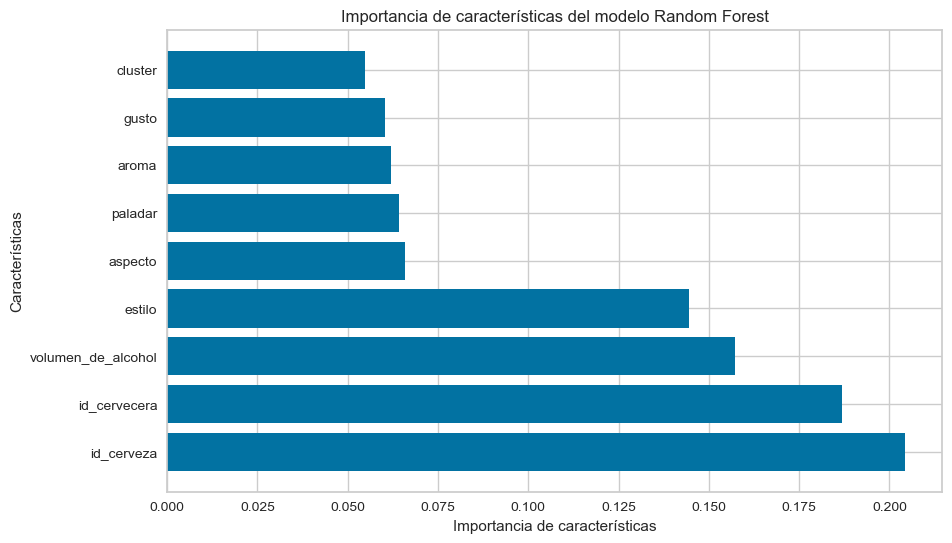

,Características,Importancia
7,id_cerveza,0.204327
6,id_cervecera,0.186813
5,volumen_de_alcohol,0.157275
2,estilo,0.144415
1,aspecto,0.065865
3,paladar,0.064201
0,aroma,0.061929
4,gusto,0.060400
8,cluster,0.054775


In [227]:
random_forest_feature_importance(df_cervezas_encoder_scaled, 'gusta')

Se va a probar el algoritmo con todas

In [228]:
# Division del conjunto en los diferentes subconjuntos
train_set, val_set, test_set = train_val_test_split(df_cervezas_encoder_scaled)
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 9493
Longitud del Validation Set: 3164
Longitud del Test Set: 3165


In [229]:
# Función para dividir las features de la variable target
def split_features_target(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    return X, y

In [231]:
# Uso de la función
X_train, y_train = split_features_target(train_set, 'gusta')
X_test, y_test = split_features_target(test_set, 'gusta')
X_val, y_val = split_features_target(val_set, 'gusta')

In [232]:
# Definición de función para aplicar algoritmo de Random Forest
def random_forest_model(X_train, y_train, X_test, y_test, X_val, y_val):
    # Inicializar el modelo de Random Forest
    model = RandomForestClassifier(random_state=42)
    
    # Entrenar el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)
    
    # Validar el modelo con el conjunto de test
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Accuracy en el conjunto de test:", test_accuracy)

    #MÉTRICAS CONJUNTO DE TEST
    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Graficar la matriz de confusión
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Test')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    auc = roc_auc_score(y_test, y_test_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    #MÉTRICAS CONJUNTO DE VALIDACIÓN
    # Evaluar el modelo con el conjunto de validación
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Accuracy en el conjunto de validación:", val_accuracy)

    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_val, y_val_pred)
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Validación')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
    auc = roc_auc_score(y_val, y_val_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Obtener la importancia de las características
    feature_importance = model.feature_importances_
    feature_names = X_train.columns.tolist()
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
    print("Importancia de las características:")
    for feature, importance in sorted_feature_importance:
        print(f"{feature}: {importance}")
    
    return model

Accuracy en el conjunto de test: 0.6597156398104266


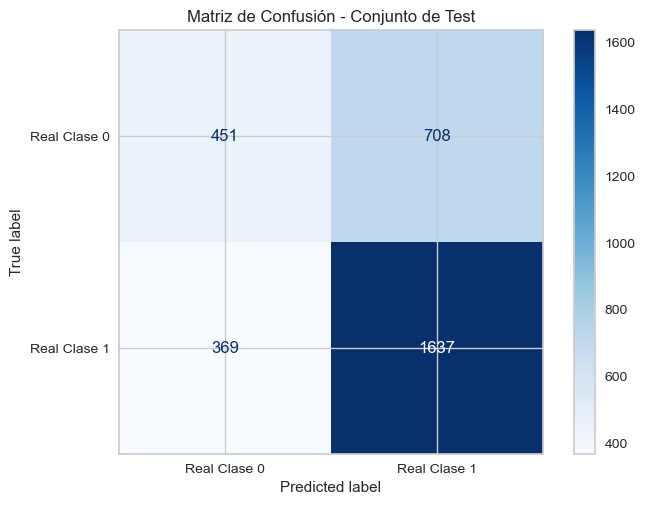

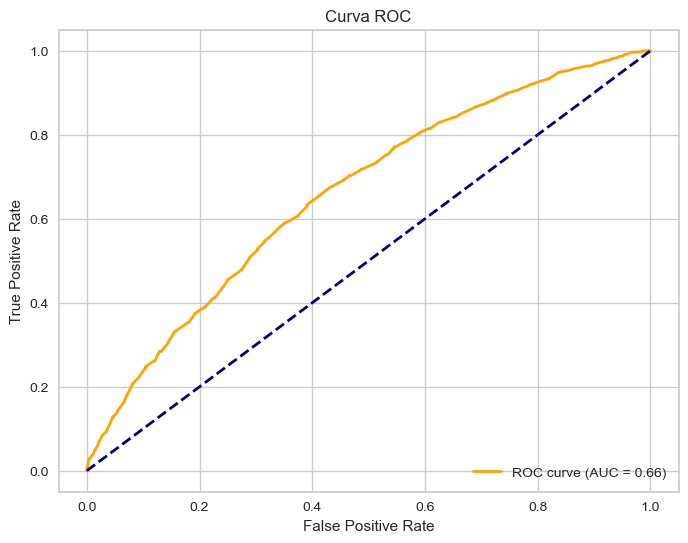

Accuracy en el conjunto de validación: 0.6469658659924147


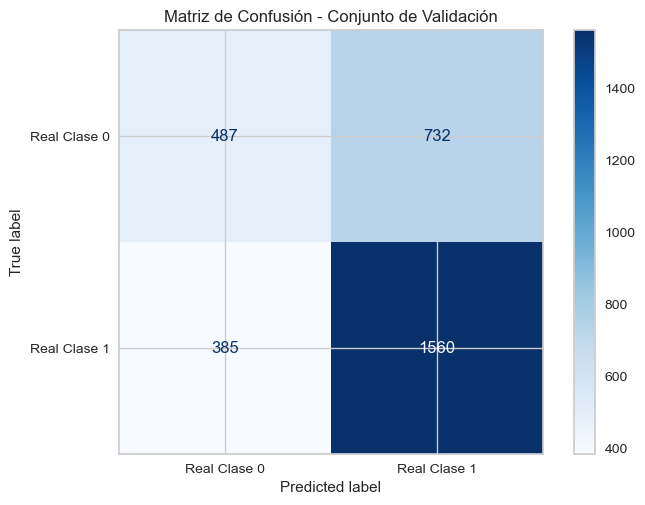

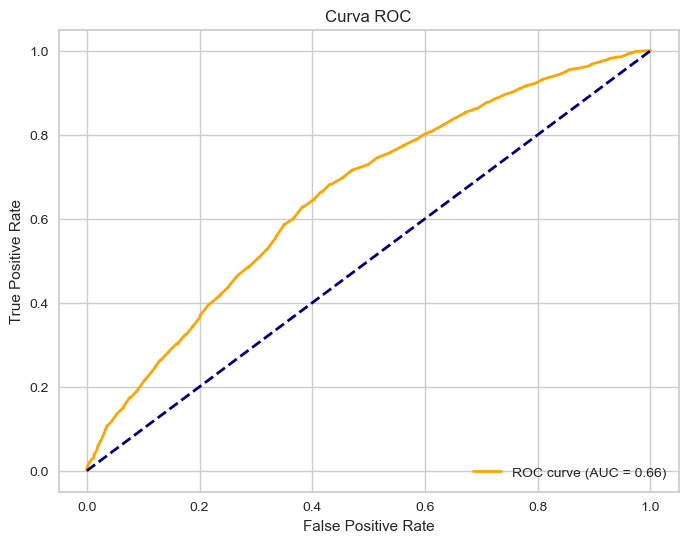

Importancia de las características:
id_cerveza: 0.2025830041311839
id_cervecera: 0.18641644189525028
volumen_de_alcohol: 0.1554459846364286
estilo: 0.14685768257601867
aspecto: 0.06708674715511055
paladar: 0.0648471953309332
aroma: 0.06181161199746765
gusto: 0.061711438784510936
cluster: 0.05323989349309621


RandomForestClassifier(random_state=42)

In [235]:
random_forest_model(X_train, y_train, X_test, y_test, X_val, y_val)

### Regresión Logística

In [236]:
# Función para emplear el modelo de Regresión Logística
def logistic_regression_model(X_train, y_train, X_test, y_test, X_val, y_val):
    # Inicializar el modelo de regresión logística
    model = LogisticRegression(max_iter=1000)
    
    # Entrenar el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)
    
    # Validar el modelo con el conjunto de test
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Accuracy en el conjunto de test:", test_accuracy)

    #MÉTRICAS CONJUNTO DE TEST
    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Graficar la matriz de confusión
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Test')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    auc = roc_auc_score(y_test, y_test_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    #MÉTRICAS CONJUNTO DE VALIDACIÓN
    # Evaluar el modelo con el conjunto de validación
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Accuracy en el conjunto de validación:", val_accuracy)

    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_val, y_val_pred)
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Validación')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
    auc = roc_auc_score(y_val, y_val_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Obtener la importancia de las características
    feature_importance = model.coef_[0]
    feature_names = X_train.columns.tolist()
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
    print("Importancia de las características:")
    for feature, importance in sorted_feature_importance:
        print(f"{feature}: {importance}")
    
    return model

Accuracy en el conjunto de test: 0.6338072669826225


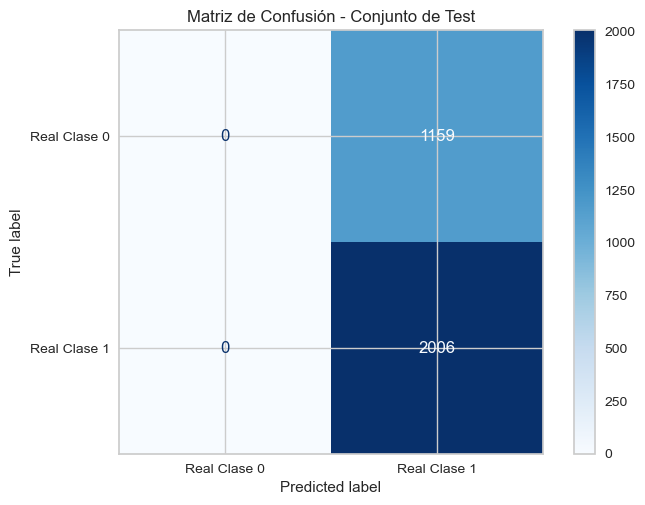

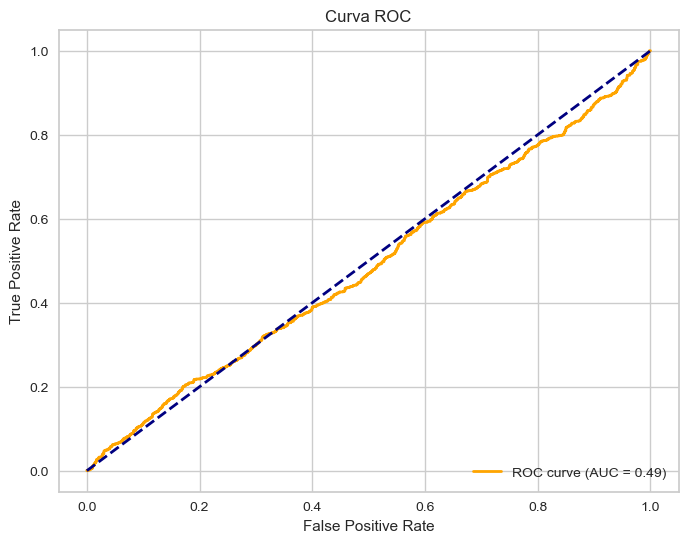

Accuracy en el conjunto de validación: 0.6147281921618205


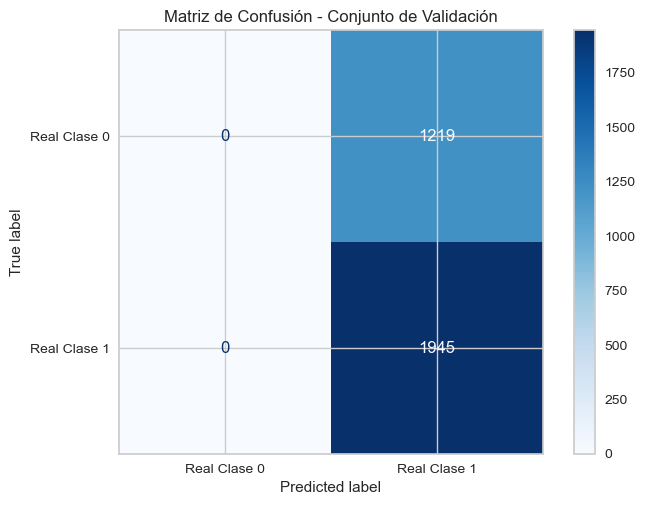

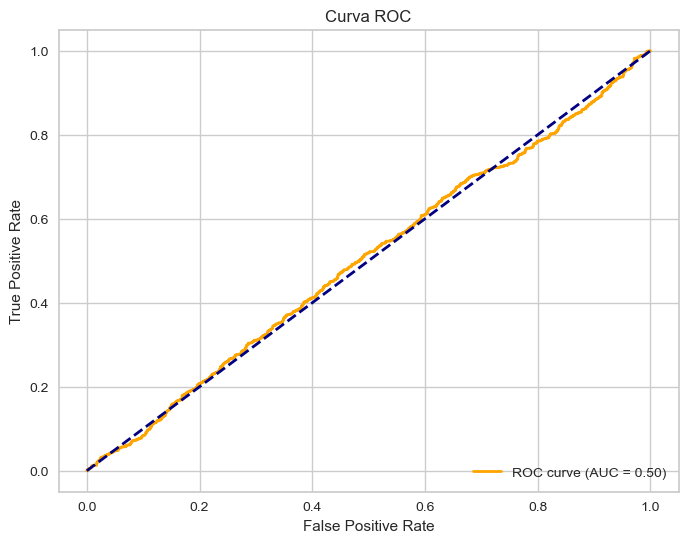

Importancia de las características:
id_cerveza: 1.0816399874385936e-05
id_cervecera: 3.535632713959916e-06
gusto: 1.808876274481487e-08
aroma: 1.7439178704635524e-08
aspecto: 1.7322673394840048e-08
paladar: 1.7096474731153922e-08
estilo: 7.539557113790368e-09
cluster: 5.9804970666184606e-09
volumen_de_alcohol: 3.795154529176917e-09


LogisticRegression(max_iter=1000)

In [237]:
logistic_regression_model(X_train, y_train, X_test, y_test, X_val, y_val)

### Árbol de decisión

In [238]:
def decision_tree_model(X_train, y_train, X_test, y_test, X_val, y_val):
    # Inicializar el modelo de árbol de decisión
    model = DecisionTreeClassifier()
    
    # Entrenar el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)
    
    # Validar el modelo con el conjunto de test
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Accuracy en el conjunto de test:", test_accuracy)

    #MÉTRICAS CONJUNTO DE TEST
    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Graficar la matriz de confusión
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Test')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    auc = roc_auc_score(y_test, y_test_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    #MÉTRICAS CONJUNTO DE VALIDACIÓN
    # Evaluar el modelo con el conjunto de validación
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Accuracy en el conjunto de validación:", val_accuracy)

    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_val, y_val_pred)
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Validación')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
    auc = roc_auc_score(y_val, y_val_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Obtener la importancia de las características
    feature_importance = model.feature_importances_
    feature_names = X_train.columns.tolist()
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
    print("Importancia de las características:")
    for feature, importance in sorted_feature_importance:
        print(f"{feature}: {importance}")
    
    return model

Accuracy en el conjunto de test: 0.5788309636650869


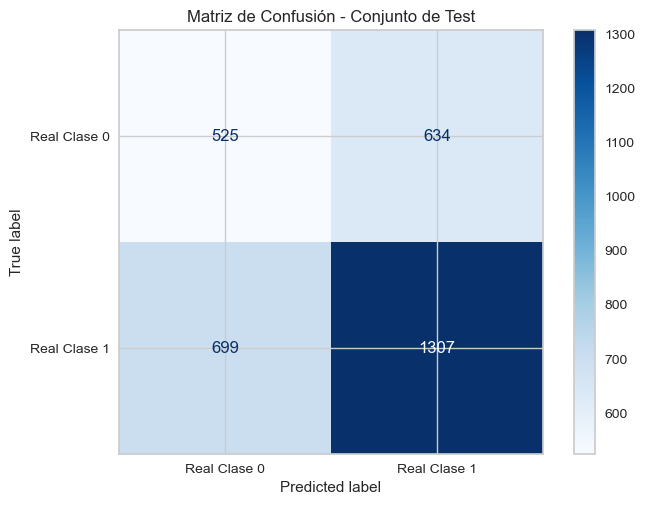

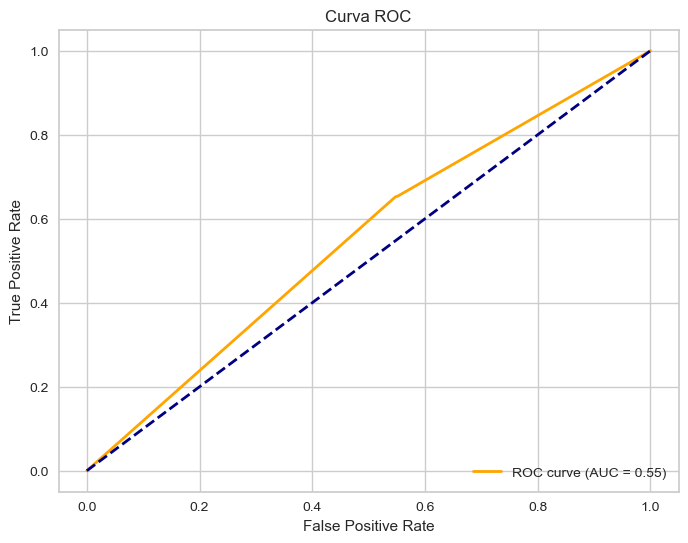

Accuracy en el conjunto de validación: 0.5847029077117573


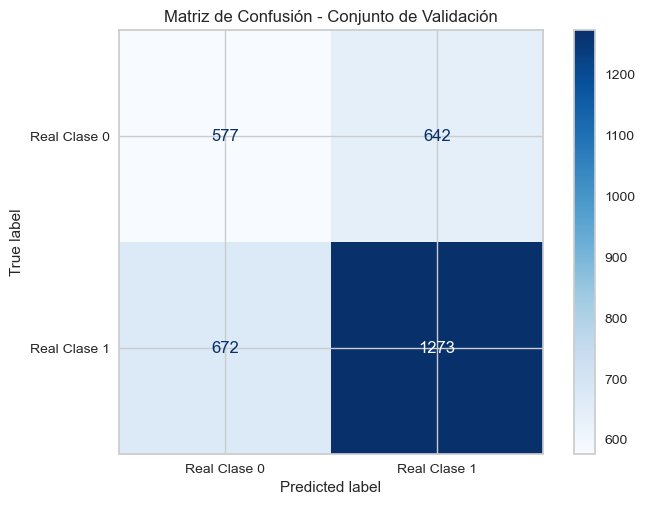

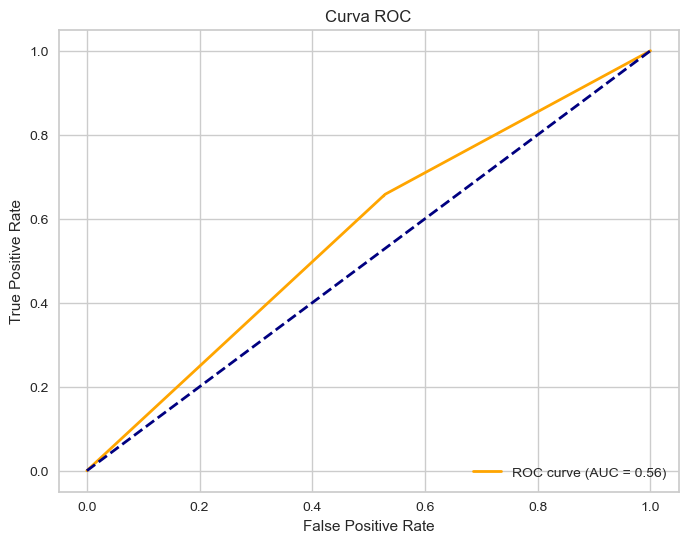

Importancia de las características:
id_cerveza: 0.20650349362438017
id_cervecera: 0.19520273609747474
volumen_de_alcohol: 0.14696601169039536
estilo: 0.13264954428409015
aroma: 0.07396029752388386
gusto: 0.07201207876079414
aspecto: 0.06794477664311659
paladar: 0.06208488801385779
cluster: 0.042676173362007234


DecisionTreeClassifier()

In [239]:
decision_tree_model(X_train, y_train, X_test, y_test, X_val, y_val)

### Gaussian Naive Bayes

In [240]:
def gaussian_naive_bayes_model(X_train, y_train, X_test, y_test, X_val, y_val):
    # Inicializar el modelo de Naive Bayes Gaussiano
    model = GaussianNB()
    
    # Entrenar el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)
    
    # Validar el modelo con el conjunto de test
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Accuracy en el conjunto de test:", test_accuracy)

    #MÉTRICAS CONJUNTO DE TEST
    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Graficar la matriz de confusión
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Test')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    auc = roc_auc_score(y_test, y_test_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    #MÉTRICAS CONJUNTO DE VALIDACIÓN
    # Evaluar el modelo con el conjunto de validación
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Accuracy en el conjunto de validación:", val_accuracy)

    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_val, y_val_pred)
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Validación')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
    auc = roc_auc_score(y_val, y_val_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    return model

Accuracy en el conjunto de test: 0.6341232227488152


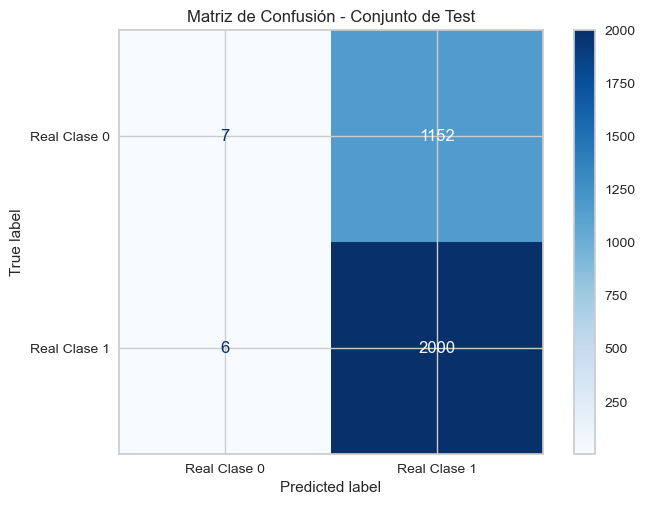

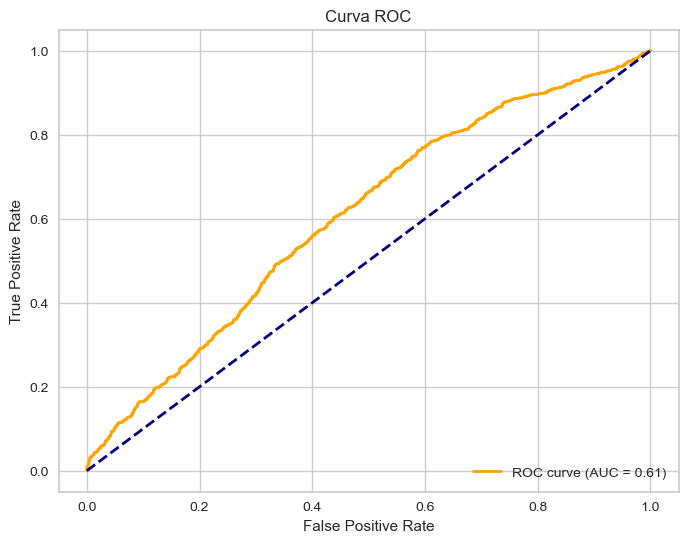

Accuracy en el conjunto de validación: 0.6144121365360303


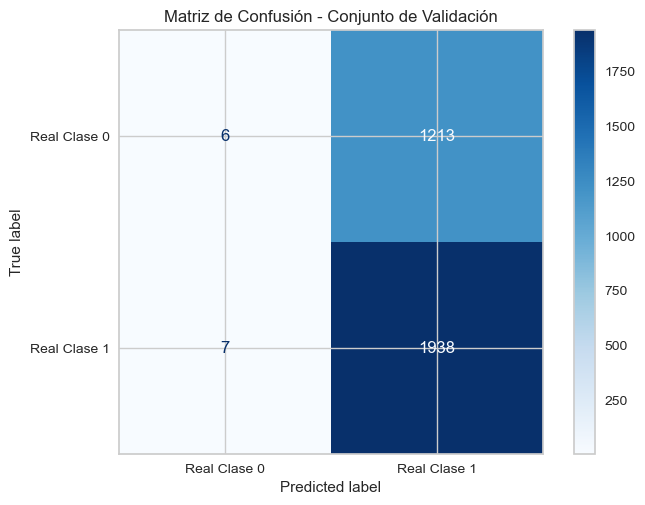

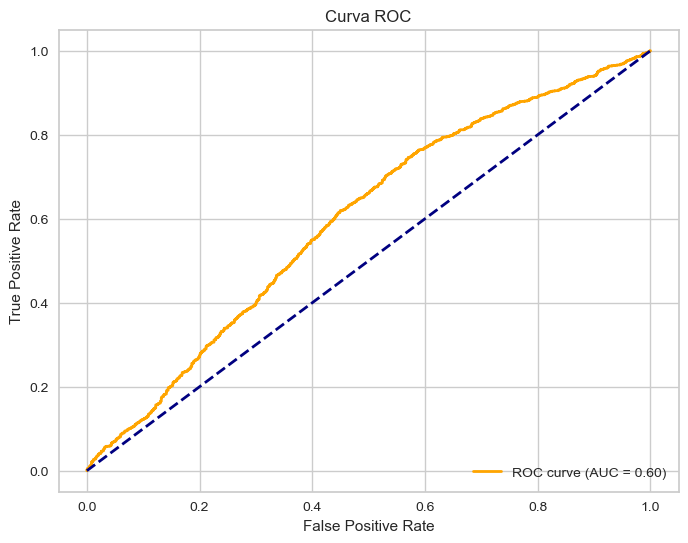

GaussianNB()

In [244]:
gaussian_naive_bayes_model(X_train, y_train, X_test, y_test, X_val, y_val)